# Stéganographie

## Exercice 1 - Conversion de base

In [ ]:
import numpy as np

def to_binary(decimal):
    binary = []
    for exponent in range(7, -1, -1):
        power = 2 ** exponent
        if decimal >= power:
            decimal = decimal - power
            binary.append(1)
        else:
            binary.append(0)
    binary = np.array(binary)
    binary = np.flip(binary)
    return binary

b = to_binary(130)
print(b)

[0 1 0 0 0 0 0 1]


In [ ]:
def to_decimal(binary):
    decimal = 0
    for i in range(0, 8):
        decimal = decimal + binary[i] * 2 ** i
    return decimal

d = to_decimal(b)
print(d)

130


## Exercice 2 - Chargement et visualisation d'une image

[[[ 89  88  70 255]
  [ 90  88  70 255]
  [ 90  72  70 255]
  ...
  [ 59  43  21 255]
  [ 59  43  21 255]
  [ 59  43  21 255]]

 [[106  88  70 255]
  [ 90  88  70 255]
  [ 90  72  70 255]
  ...
  [ 59  43  21 255]
  [ 59  43  37 255]
  [ 59  43  37 255]]

 [[106  88  70 255]
  [ 90  88  70 255]
  [ 90  72  70 255]
  ...
  [ 59  43  38 255]
  [ 59  43  37 255]
  [ 59  59  37 255]]

 ...

 [[ 74  72  70 255]
  [ 74  72  70 255]
  [ 73  87  85 255]
  ...
  [ 91  73  55 255]
  [ 91  72  54 255]
  [ 91  72  54 255]]

 [[ 74  72  70 255]
  [ 74  72  70 255]
  [ 74  87  85 255]
  ...
  [ 91  73  55 255]
  [ 91  73  55 255]
  [ 91  73  55 255]]

 [[ 74  72  70 255]
  [ 75  72  70 255]
  [ 74  88  85 255]
  ...
  [ 92  73  55 255]
  [ 91  73  55 255]
  [ 91  73  55 255]]]
(441, 540, 4)


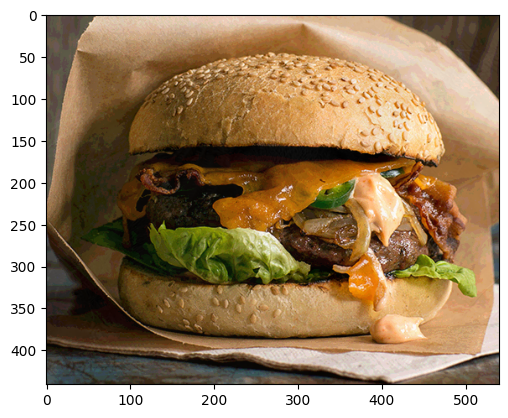

In [10]:
from PIL.Image import open
from matplotlib.pyplot import imshow, show

image = np.array(open('burger_mystery_rillette.png'))
print(image)
print(np.shape(image))
imshow(image)
show()

## Exercice 3 - Manipulation des images

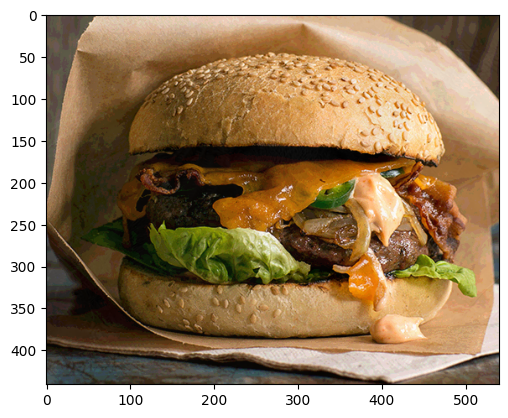

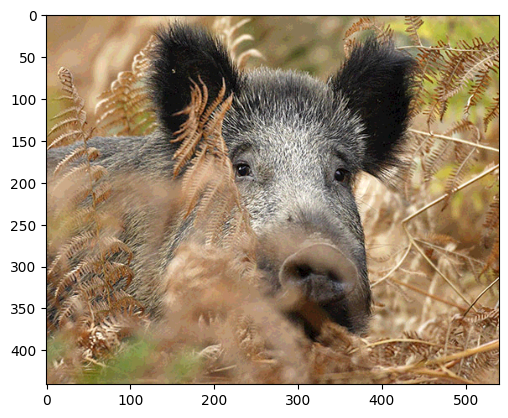

In [11]:
def decode_image(image):
    # trois boucles imbriquées pour parcourir toutes les valeurs dans le tenseur 3D
    for i in range(np.shape(image)[0]):
        for j in range(np.shape(image)[1]):
            for k in range(3):
                taux_décimal = image[i,j,k] # lecture du taux décimal (0-255) dans le tenseur
                taux_binaire = to_binary(taux_décimal)  # conversion en binaire
                for m in range(4): # décodage
                    taux_binaire[m+4] = taux_binaire[m]
                nouveau_taux_décimal =  to_decimal(taux_binaire) # reconversion en décimal
                image[i,j,k] = nouveau_taux_décimal # écriture du taux modifié dans le tenseur
    return image

imshow(image)
show()
imshow(decode_image(image))
show()